In [122]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
# -------------------------- 1. 顶刊风格全局配置（通用，无需修改）--------------------------
# 建议放在所有绘图代码最前面
import matplotlib.pyplot as plt

plt.rcParams.update({
    # —— 输出与字体嵌入（矢量优先，可在 Illustrator/AI 中编辑）——
    'savefig.format': 'pdf',          # Nature 推荐提交 PDF（矢量）
    'figure.dpi': 300,                # 预览分辨率
    'savefig.dpi': 600,               # 栅格元素（若有）更清晰
    'pdf.fonttype': 42,               # TrueType，便于后期编辑
    'ps.fonttype': 42,
    'svg.fonttype': 'none',           # SVG 保留文字，不转曲线

    # —— 版式与尺寸
    # （单栏单图（3，2），双栏双图(5.5, 4)，双栏三图(7.5, 1.5)，可根据宽度高度稍微调整）——
    'figure.figsize': (3, 2),     # 默认单栏尺寸
    'figure.facecolor': 'white',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.02,
    'savefig.transparent': False,     # Journal 通常要求白底
    'figure.constrained_layout.use': False,

    # —— 字体（Nature：无衬线，常用 Arial/Helvetica）——
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],  # 加 DejaVu 兜底
    'axes.unicode_minus': True,       # 使用真正的“−”号
    'text.usetex': False,             # 非必须不启用 LaTeX

    # —— 数学字体与指数记法（与无衬线主体保持一致）——
    'mathtext.fontset': 'dejavusans',
    'axes.formatter.use_mathtext': True,
    'axes.formatter.limits': (-3, 3), # 仅在 <1e-3 或 >1e3 时切换科学计数

    # —— 字号（印刷 6.5–7 pt 常用；一致、紧凑）——
    'font.size': 7,
    'axes.labelsize': 7,
    'axes.titlesize': 7,
    'xtick.labelsize': 6.5,
    'ytick.labelsize': 6.5,
    'legend.fontsize': 6.5,
    'legend.title_fontsize': 7,

    # —— 坐标轴与刻度（四边框 + 内向刻度 + 启用次刻度）——
    'axes.spines.top': True,  # 设置为false就是去掉图框中上面的线
    'axes.spines.right': True, # 设置为false就是去掉图框中右面的线
    'axes.linewidth': 0.6,            # 细边框（~0.5–0.7 pt）
    'axes.labelpad': 2.0,

    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.top': True,
    'ytick.right': True,

    'xtick.minor.visible': True,  # 显示 x 轴的次刻度线
    'ytick.minor.visible': True,  # 显示 y 轴的次刻度线

    'xtick.major.size': 4,
    'xtick.major.width': 0.6,
    'xtick.minor.size': 2,
    'xtick.minor.width': 0.4,
    'xtick.major.pad': 2,

    'ytick.major.size': 4,
    'ytick.major.width': 0.6,
    'ytick.minor.size': 2,
    'ytick.minor.width': 0.4,
    'ytick.major.pad': 2,

    # —— 线型、误差棒与图例 —— 
    'lines.linewidth': 0.8,           # 细线，避免过粗
    'lines.markersize': 3.0,
    'errorbar.capsize': 2.0,

    'legend.frameon': False,
    'legend.handlelength': 2.0,
    'legend.handleheight': 0.7,
    'legend.borderaxespad': 1,
    'legend.columnspacing': 2,
})

def log_format(x, pos):
    if x > 0:
        return f'{int(np.log10(x))}'  # 将10^x的标签简化为x
    else:
        return f'{x}'

# 顶刊配色（通用）
colors = {
    'blue': '#1f77b4', 'orange': '#ff7f0e', 'green': '#2ca02c',
    'red': '#d62728', 'purple': '#9467bd', 'dark_gray': '#595959'
}


C:\Users\11387\AppData\Local\Temp\ipykernel_10984\2431918525.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("Blues_r")


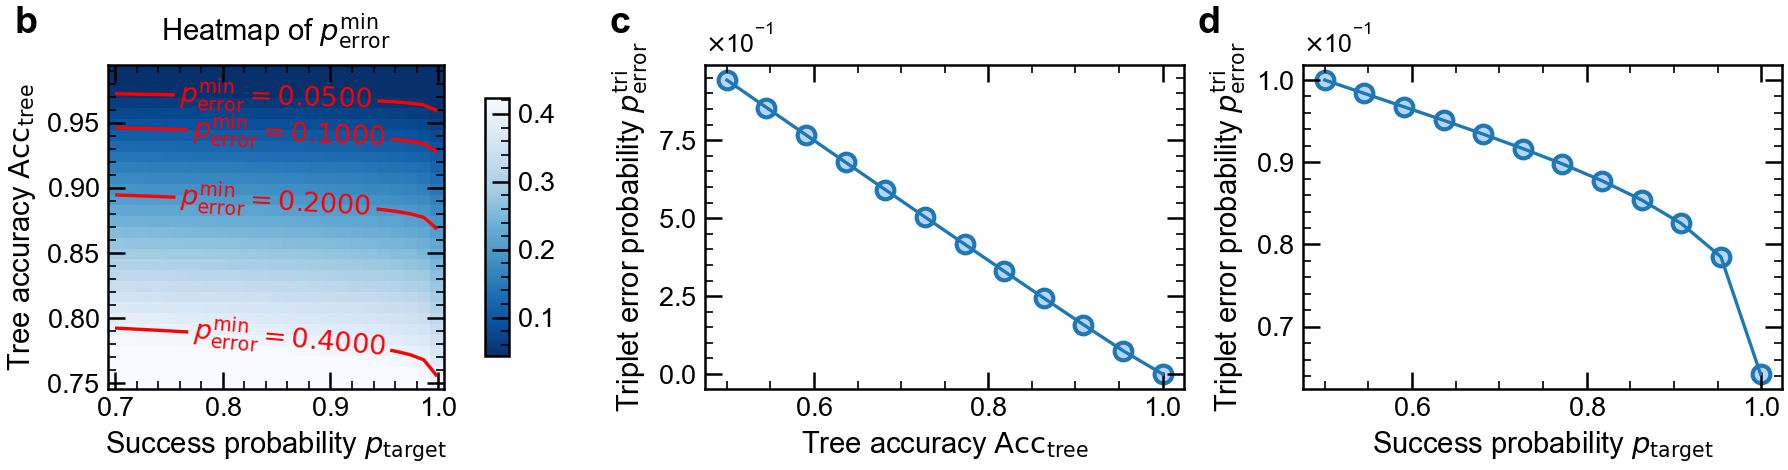

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfcinv
from matplotlib.cm import get_cmap
from plot_style import configure_journal_style
from matplotlib.ticker import ScalarFormatter

configure_journal_style()
colors = {
    'blue': '#1f77b4',
    'red': '#d62728',
}

# =============================
# 参数
# =============================
n_cell = 10
comb_nc3 = n_cell * (n_cell - 1) * (n_cell - 2) / 6

# =============================
# 三元组错误率下界
# =============================
def p_error_tri(p_target, acc_target):
    z = np.sqrt(2) * erfcinv(2 * (1 - p_target))
    term = z / np.sqrt(comb_nc3)
    return (1 / 16) * (-term + np.sqrt(term**2 + 32 * (1 - acc_target)))**2


# =============================
# Figure & Grid
# =============================
fig = plt.figure(figsize=(7.2, 1.4), dpi=300)

gs = fig.add_gridspec(
    1, 4,
    width_ratios=[0.7, 0.05, 1,1],
    wspace=0.36
)
# =============================
# (b) Heatmap
# =============================
ax_hm = fig.add_subplot(gs[0, 0])
cax_hm = fig.add_subplot(gs[0, 1])

p_target_vals = np.linspace(0.7, 0.999, 25)
acc_vals = np.linspace(0.75, 0.99, 30)
P, ACC = np.meshgrid(p_target_vals, acc_vals)
p_err_grid = p_error_tri(P, ACC)

# --- ① 降低对比度：蓝-白、接近白色 ---
cmap = get_cmap("Blues_r")

vmin = np.percentile(p_err_grid, 90)
vmax = np.percentile(p_err_grid, 10)

mesh = ax_hm.pcolormesh(
    P, ACC, p_err_grid,
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    shading="auto"
)


# 等高线
V = [0.05, 0.1, 0.2, 0.4]
CS = ax_hm.contour(P, ACC, p_err_grid, levels=V,
                   colors="r", linewidths=0.8)
ax_hm.clabel(
    CS,
    inline=True,
    fontsize=6.5,
    fmt=lambda v: rf"$p_{{\mathrm{{error}}}}^{{\mathrm{{min}}}}={v:.4f}$"
)

# 竖直 colorbar
cbar = fig.colorbar(mesh, cax=cax_hm, orientation="vertical")
# cbar.set_label(r"$p_{\mathrm{error}}^{\mathrm{min}}$", fontsize=6)
cax_hm.yaxis.set_ticks_position("right")

# --- ② colorbar 缩短并垂直居中 ---
pos = cax_hm.get_position()
new_h = pos.height * 0.8
new_y = pos.y0 + (pos.height - new_h) / 2

cax_hm.set_position([
    pos.x0 - 0.036,   # 向左靠近热力图
    new_y,           # 垂直居中
    pos.width,
    new_h
])

# 标签
ax_hm.set_xlabel(r"Success probability $p_{\mathrm{target}}$", fontsize=7)
ax_hm.set_ylabel(r"Tree accuracy $\mathrm{Acc}_{\mathrm{tree}}$", fontsize=7)
ax_hm.set_title(r"Heatmap of $p_{\mathrm{error}}^{\mathrm{min}}$", fontsize=7)

ax_hm.text(-0.28, 1.1, "b", transform=ax_hm.transAxes,
           fontsize=9, fontweight="bold")


# =============================
# (c) p_error vs accuracy
# =============================
axC = fig.add_subplot(gs[0, 2])

p_target_fixed = 0.9
accuracy_values = np.linspace(0.5, 1.0, 12)
p_error_values_acc = p_error_tri(p_target_fixed, accuracy_values)
axC.plot(accuracy_values, p_error_values_acc, color=colors["blue"], lw=0.8)
axC.scatter(accuracy_values, p_error_values_acc, s=18,
            facecolors=(0.3, 0.6, 1.0, 0.4),
            edgecolors=colors["blue"])
axC.set_xlabel(r"Tree accuracy $\mathrm{Acc}_{\mathrm{tree}}$", fontsize=7)
axC.set_ylabel(r"Triplet error probability $p_{\mathrm{error}}^{\mathrm{tri}}$", fontsize=7)

axC.text(-0.2, 1.1, "c", transform=axC.transAxes,
         fontsize=9, fontweight="bold")

# =============================
# (d) p_error vs p_target
# =============================
axD = fig.add_subplot(gs[0, 3])

acc_target_fixed = 0.95
p_target_values = np.linspace(0.5, 0.999, 12)
p_error_values_pt = p_error_tri(p_target_values, acc_target_fixed)

axD.plot(p_target_values, p_error_values_pt, color=colors["blue"], lw=0.8)
axD.scatter(p_target_values, p_error_values_pt, s=18,
            facecolors=(0.3, 0.6, 1.0, 0.4),
            edgecolors=colors["blue"])
axD.set_xlabel(r"Success probability $p_{\mathrm{target}}$", fontsize=7)
axD.set_ylabel(r"Triplet error probability $p_{\mathrm{error}}^{\mathrm{tri}}$", fontsize=7)

axD.text(-0.22, 1.1, "d", transform=axD.transAxes,
         fontsize=9, fontweight="bold")

for ax in [axC, axD]:
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    ax.yaxis.set_major_formatter(formatter)
    ax.yaxis.get_offset_text().set_size(6)

# =============================
# Save
# =============================
plt.savefig("Fig_triplet_error_1x3.pdf", dpi=300, bbox_inches="tight")
plt.show()


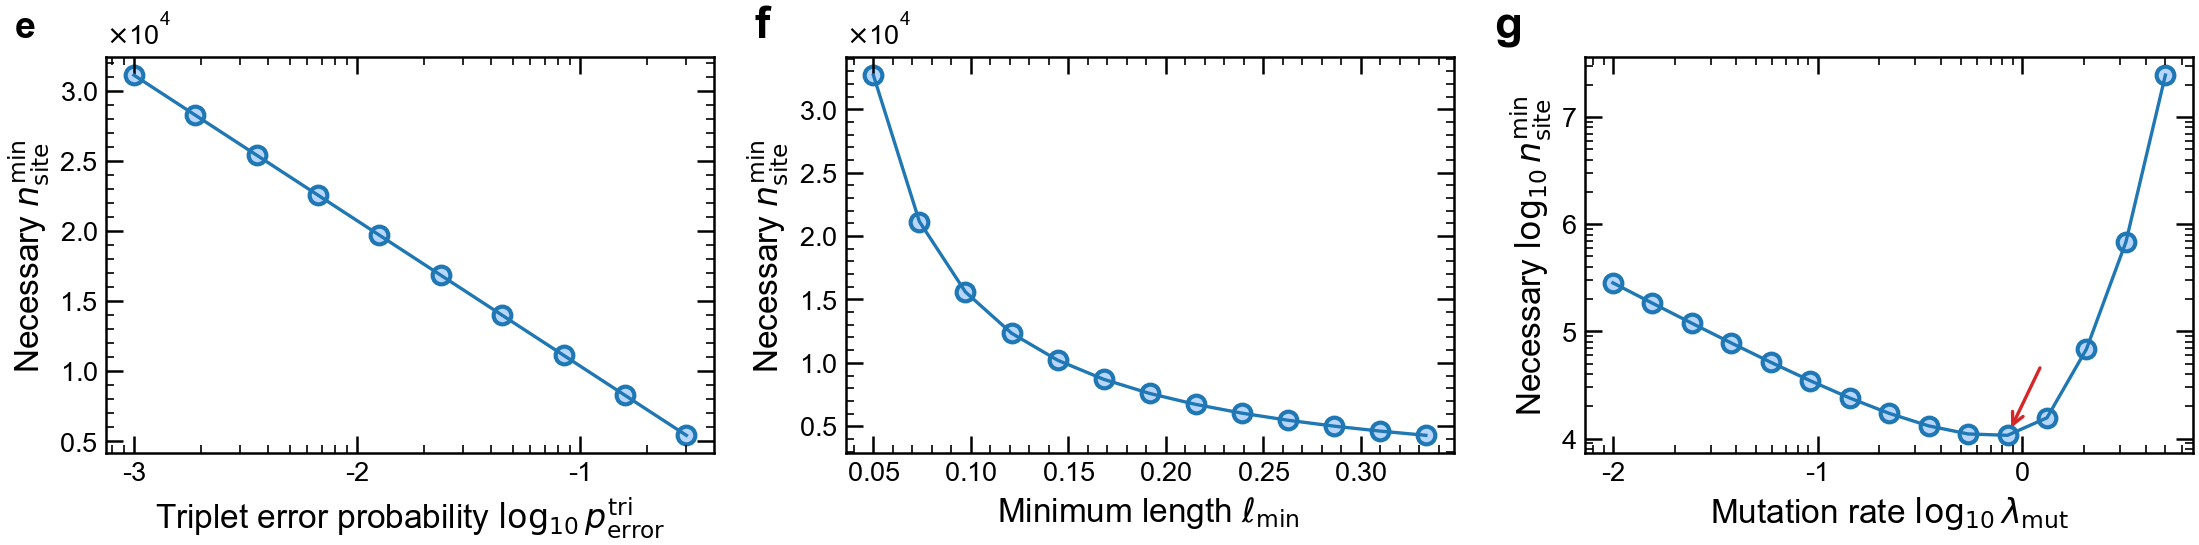

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from plot_style import configure_journal_style

configure_journal_style()

colors = {
    'blue': '#1f77b4',
    'red': '#d62728',
}

# =========================================================
# delta* function
# =========================================================
def solve_delta_star(d, lambda_param, q):
    return 0.6 * (
        np.exp(-lambda_param * d) * (1 - q)
        + q * np.exp(-lambda_param * (2 - d))
    )

# =========================================================
# Fixed parameters
# =========================================================
error = 0.05
q0 = 0.04
p_miss = 0.05
l_star0 = 1 / 9
d0 = 1
lambda0 = 0.25

# =========================================================
# (c) error dependence (log-uniform)
# =========================================================
error_values = np.logspace(np.log10(0.001), np.log10(0.3), 10)
k_values_error = []

for err in error_values:
    delta_star = minimize_scalar(
        solve_delta_star, bounds=(0, d0),
        method="bounded", args=(lambda0, q0)
    ).fun

    k1 = (-32 * np.log(err)) * q0 / (l_star0**2 * delta_star**2)
    k2 = (-32 * np.log(err)) * (l_star0 + (1 - np.exp(-lambda0)) * q0) / (
        0.6 * lambda0 * l_star0**2 * delta_star *
        (1 - q0 + q0 * np.exp(-2 * lambda0))
    )

    k_values_error.append(max(k1, k2))

k_values_error = np.array(k_values_error)

# =========================================================
# (d) l_min dependence
# =========================================================
l_star_values = np.linspace(1 / 20, 1 / 3, 13)
k_values_l_star = []

for l_star in l_star_values:
    delta_star = minimize_scalar(
        solve_delta_star, bounds=(0, d0),
        method="bounded", args=(lambda0, q0)
    ).fun

    k1 = (-32 * np.log(error)) * q0 / (l_star**2 * delta_star**2)
    k2 = (-32 * np.log(error)) * (l_star + (1 - np.exp(-lambda0)) * q0) / (
        0.6 * lambda0 * l_star**2 * delta_star *
        (1 - q0 + q0 * np.exp(-2 * lambda0))
    )

    k_values_l_star.append(max(k1, k2))

k_values_l_star = np.array(k_values_l_star)

# =========================================================
# (e) lambda dependence
# =========================================================
lambda_values = np.logspace(-2, np.log10(5), 15)
k_values_lambda = []

for lam in lambda_values:
    delta_star = minimize_scalar(
        solve_delta_star, bounds=(0, d0),
        method="bounded", args=(lam, q0)
    ).fun

    prefactor = (-32 * np.log(error)) / (delta_star * l_star0**2)

    k1 = q0 / (delta_star * (1 - p_miss)**5) * prefactor
    k2 = (
        (l_star0 + q0 * lam) * (1 + 2 * q0 * lam)
        / (0.6 * lam * (1 - p_miss)**3)
    ) * prefactor

    k_values_lambda.append(max(k1, k2))

k_values_lambda = np.array(k_values_lambda)

idx_min = np.argmin(k_values_lambda)
lambda_min = lambda_values[idx_min]
k_min = k_values_lambda[idx_min]

# =========================================================
# Plot: 1 × 3 panels
# =========================================================
fig, (axC, axD, axE) = plt.subplots(
    1, 3, figsize=(7.5, 2.0), dpi=300
)

# ---------------- (c) error ----------------
axC.plot(error_values, k_values_error, lw=0.8, color=colors["blue"])
axC.scatter(error_values, k_values_error, s=18,
            facecolors=(0.3, 0.6, 1.0, 0.4),
            edgecolors=colors["blue"])

axC.set_xscale("log")
axC.set_xlabel(r"Triplet error probability $\log_{10}p_{\mathrm{error}}^{\mathrm{tri}}$", fontsize=8)
axC.set_ylabel(r"Necessary $n_{\mathrm{site}}^{\mathrm{min}}$", fontsize=8)
axC.text(-0.15, 1.05, "e", transform=axC.transAxes,
         fontsize=9, fontweight="bold")
axC.xaxis.set_major_formatter(FuncFormatter(log_format)) 

# ---------------- (d) l_min ----------------
axD.plot(l_star_values, k_values_l_star, lw=0.8, color=colors["blue"])
axD.scatter(l_star_values, k_values_l_star, s=18,
            facecolors=(0.3, 0.6, 1.0, 0.4),
            edgecolors=colors["blue"])

axD.set_xlabel(r"Minimum length $\ell_{\min}$ ", fontsize=8)
axD.set_ylabel(r"Necessary $n_{\mathrm{site}}^{\mathrm{min}}$", fontsize=8)
axD.text(-0.15, 1.05, "f", transform=axD.transAxes,
         fontsize=11, fontweight="bold")

# ---------------- (e) lambda ----------------
axE.plot(lambda_values, k_values_lambda, lw=0.8, color=colors["blue"])
axE.scatter(lambda_values, k_values_lambda, s=18,
            facecolors=(0.3, 0.6, 1.0, 0.4),
            edgecolors=colors["blue"])

axE.set_xscale("log")
axE.set_yscale("log")

axE.annotate(
    "",  # 不显示文字
    xy=(lambda_min, k_min),
    xytext=(lambda_min *1.5, k_min * 5),
    arrowprops=dict(
        arrowstyle="->",
        lw=0.8,
        color=colors["red"]
    )
)
axE.set_xlabel(r"Mutation rate $\log_{10}\lambda_{\mathrm{mut}}$", fontsize=8)
axE.set_ylabel(r"Necessary $\log_{10}n_{\mathrm{site}}^{\mathrm{min}}$", fontsize=8)
axE.text(-0.15, 1.05, "g", transform=axE.transAxes,
         fontsize=11, fontweight="bold")
axE.xaxis.set_major_formatter(FuncFormatter(log_format)) 
axE.yaxis.set_major_formatter(FuncFormatter(log_format)) 
# =========================================================
plt.tight_layout()
plt.savefig("Fig_combined_cde.pdf", dpi=300, bbox_inches="tight")
plt.show()


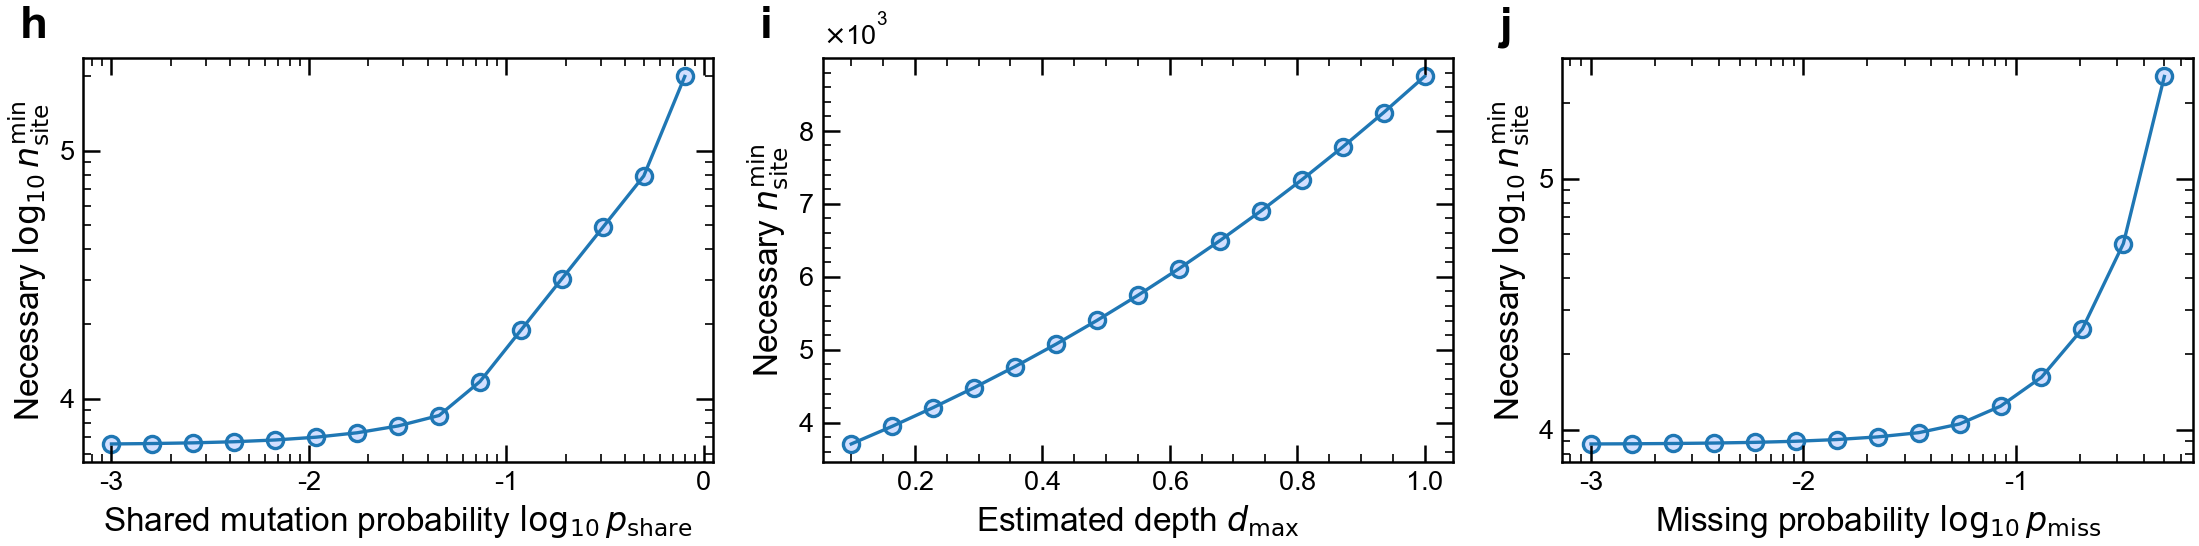

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from plot_style import configure_journal_style

configure_journal_style()

colors = {
    'blue': '#1f77b4',
    'orange': '#ff7f0e',
    'green': '#2ca02c',
    'red': '#d62728',
    'gray': '#7f7f7f'
}

# =========================================================
#                delta* 函数
# =========================================================
def solve_delta_star(d, lambda_param, q):
    return 0.6 * (np.exp(-lambda_param * d) * (1 - q) +
                  q * np.exp(-lambda_param * (2 - d)))

# 固定参数
error = 0.05
q0 = 0.05
l_star0 = 1/9
d0 = 1
lambda0 = 1

# =========================================================
#                 log 均匀采样
# =========================================================
# q
q_log = np.linspace(np.log10(0.001), np.log10(0.8), 15)
q_values = 10**q_log

# d
d_values = np.linspace(0.1, 1, 15)

# p_miss
p_miss_log = np.linspace(np.log10(0.001), np.log10(0.5), 15)
p_miss_values = 10**p_miss_log

# =========================================================
#                    计算 k(q)
# =========================================================
k_values_q = []
for q in q_values:
    delta_star = minimize_scalar(solve_delta_star, bounds=(0, d0),
                                 method='bounded', args=(lambda0, q)).fun
    k1 = (-32 * np.log(error)) * q / (l_star0**2 * delta_star**2)
    k2 = (-32 * np.log(error)) * (l_star0 + (1 - np.exp(-lambda0)) * q) / \
         (0.6 * lambda0 * l_star0**2 * delta_star *
          (1 - q + q * np.exp(-2 * lambda0)))
    k_values_q.append(np.maximum(k1, k2))
k_values_q = np.array(k_values_q)

# =========================================================
#                    计算 k(d)
# =========================================================
k_values_d = []
for d in d_values:
    delta_star = minimize_scalar(solve_delta_star, bounds=(0, d),
                                 method='bounded', args=(lambda0, q0)).fun
    k1 = (-32 * np.log(error)) * q0 / (l_star0**2 * delta_star**2)
    k2 = (-32 * np.log(error)) * (l_star0 + (1 - np.exp(-lambda0)) * q0) / \
         (0.6 * lambda0 * l_star0**2 * delta_star *
          (1 - q0 + q0 * np.exp(-2 * lambda0)))
    k_values_d.append(np.maximum(k1, k2))
k_values_d = np.array(k_values_d)

# =========================================================
#                    计算 k(p_miss)
# =========================================================
k_values_p_miss = []
for p_miss in p_miss_values:
    delta_star = minimize_scalar(solve_delta_star, bounds=(0, d0),
                                 method='bounded', args=(lambda0, q0)).fun
    k1 = (-32 * np.log(error)) * q0 / (
          l_star0**2 * delta_star**2 * (1 - p_miss)**5)
    k2 = (-32 * np.log(error)) * (l_star0 + (1 - np.exp(-lambda0)) * q0) / \
         (0.6 * lambda0 * l_star0**2 * delta_star *
          (1 - q0 + q0 * np.exp(-2 * lambda0)) * (1 - p_miss)**3)
    k_values_p_miss.append(np.maximum(k1, k2))
k_values_p_miss = np.array(k_values_p_miss)

# =========================================================
#                  绘制 f, g, h 图（全部改为 blue）
# =========================================================
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2), dpi=300)
axf, axg, axh = axes

# ---------------------- f 图 (q) ----------------------
axf.plot(q_values, k_values_q, color=colors['blue'], lw=0.8)
axf.scatter(q_values, k_values_q, edgecolors=colors['blue'],
            facecolors=(0.3, 0.5, 1.0, 0.25), s=15, linewidth=0.8)
axf.set_xlabel(r"Shared mutation probability $\log_{10}p_{\text{share}}$", fontsize=8)
axf.set_ylabel(r"Necessary $\log_{10}n_{\mathrm{site}}^{\min}$", fontsize=8)
axf.text(-0.1, 1.05, "h", transform=axf.transAxes,
         fontsize=11, fontweight="bold")
axf.set_xscale("log")
axf.set_yscale("log")
axf.xaxis.set_major_formatter(FuncFormatter(log_format)) 
axf.yaxis.set_major_formatter(FuncFormatter(log_format)) 

# ---------------------- g 图 (d) ----------------------
axg.plot(d_values, k_values_d, color=colors['blue'], lw=0.8)
axg.scatter(d_values, k_values_d, edgecolors=colors['blue'],
            facecolors=(0.3, 0.5, 1.0, 0.25), s=15, linewidth=0.8)
axg.set_xlabel(r"Estimated depth $d_{\max}$", fontsize=8)
axg.set_ylabel(r"Necessary $n_{\mathrm{site}}^{\min}$", fontsize=8)
axg.text(-0.1, 1.05, "i", transform=axg.transAxes,
         fontsize=11, fontweight="bold")
# axg.set_yscale("log")
# axg.yaxis.set_major_formatter(FuncFormatter(log_format)) 

# ---------------------- h 图 (p_miss) ----------------------
axh.plot(p_miss_values, k_values_p_miss, color=colors['blue'], lw=0.8)
axh.scatter(p_miss_values, k_values_p_miss, edgecolors=colors['blue'],
            facecolors=(0.3, 0.5, 1.0, 0.25), s=15, linewidth=0.8)
axh.set_xlabel(r"Missing probability $\log_{10}p_{\mathrm{miss}}$", fontsize=8)
axh.set_ylabel(r"Necessary $\log_{10}n_{\mathrm{site}}^{\min}$", fontsize=8)
axh.text(-0.1, 1.05, "j", transform=axh.transAxes,
         fontsize=11, fontweight="bold")
axh.set_xscale("log")
axh.set_yscale("log")
axh.xaxis.set_major_formatter(FuncFormatter(log_format)) 
axh.yaxis.set_major_formatter(FuncFormatter(log_format)) 

plt.tight_layout()
plt.savefig("Fig_combined_fgh_loglog.pdf", dpi=300, bbox_inches='tight')
plt.show()

